In [192]:
import numpy as np
import matplotlib.pyplot as plt

In [193]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [194]:
inp = np.arange(-6, 6, 0.5)
ans = [round(sigmoid(i),3) for i in inp]

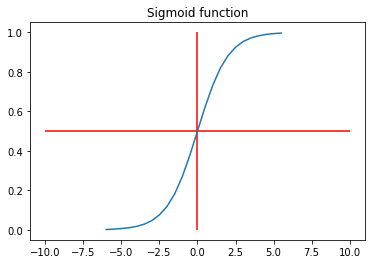

In [195]:
plt.plot(inp, ans)
plt.title('Sigmoid function')
plt.vlines(x=0, ymin=0, ymax=1, color='r')
plt.hlines(y=0.5, xmin=-10, xmax=10, color='r')
plt.show()

In [196]:
sigmoid(0)

0.5

In [197]:
import pandas as pd

In [198]:
df = pd.read_excel(r'../datafiles/Social_Network_Ads.xlsx')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [200]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,47,25000,1
4,27,57000,0


In [201]:
df.describe()

,Age,Salary,Purchased
count,284.000000,284.000000,284.000000
mean,40.746479,73535.211268,0.500000
std,10.196609,36214.254846,0.500883
min,18.000000,16000.000000,0.000000
25%,35.000000,43750.000000,0.000000
50%,40.000000,72000.000000,0.500000
75%,48.000000,96000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [202]:
(150000-73535)/36214

2.1114762246644943

In [203]:
# Are all the features at a standard scale

In [204]:
df['Purchased'].value_counts()

1    142
0    142
Name: Purchased, dtype: int64

In [205]:
# Create a not purchased mask
np_mask = df["Purchased"] == 0
df_np = df[np_mask]

In [206]:
# Create a  purchased mask
p_mask = df["Purchased"] == 1
df_p = df[p_mask]

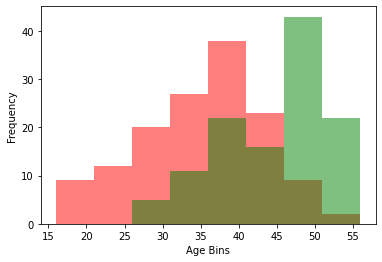

In [207]:
plt.hist(df_np['Age'], bins=np.arange(16,61,5), color='r', alpha=0.5)
plt.hist(df_p['Age'], bins=np.arange(16,61,5), color='g', alpha=0.5)
plt.xlabel("Age Bins")
plt.ylabel("Frequency")
plt.show()

In [208]:
df[df['Age']<=26]

,Age,Salary,Purchased
0,19,19000,0
2,26,43000,0
5,19,76000,0
11,25,33000,0
13,26,80000,0
14,26,52000,0
15,20,86000,0
17,18,82000,0
32,21,16000,0
38,24,32000,0


In [209]:
df[df['Age']==60]

,Age,Salary,Purchased
99,60,108000,1
107,60,102000,1
156,60,42000,1
239,60,34000,1
254,60,46000,1
255,60,83000,1
277,60,42000,1


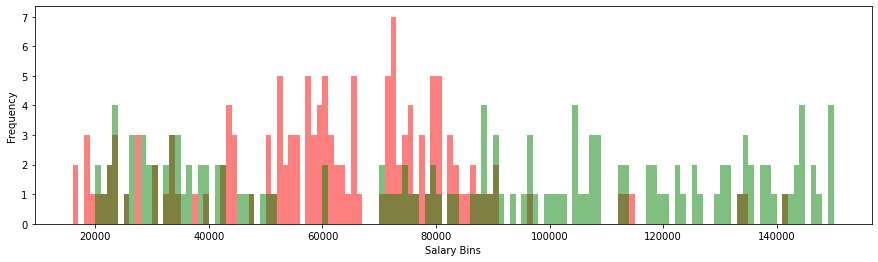

In [210]:
plt.figure(figsize=(15,4))
plt.hist(df_np['Salary'], bins=np.arange(16000,150001,1000), color='r', alpha=0.5)
plt.hist(df_p['Salary'], bins=np.arange(16000,150001,1000), color='g', alpha=0.5)
plt.xlabel("Salary Bins")
plt.ylabel("Frequency")
plt.show()

In [211]:
df[df['Salary']>=143000]

,Age,Salary,Purchased
10,32,150000,1
65,33,149000,1
95,52,150000,1
103,59,143000,1
106,37,144000,1
114,35,147000,1
123,53,143000,1
124,42,149000,1
129,51,146000,1
137,37,146000,1


## Scaling

In [212]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [213]:
X = df.iloc[:,[0,1]].values
y = df.iloc[:,-1].values

In [214]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [215]:
X_sc[:5]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064],
       [-1.44876691, -0.8446705 ],
       [ 0.6143768 , -1.34258974],
       [-1.35052197, -0.45739999]])

In [216]:
sc.inverse_transform(X_sc[:1])

array([[   19., 19000.]])

In [217]:
(19000-73535)/36214

-1.5059093168387916

### New X value = (X - min)/ (max-min)
### min and max is column specific

In [218]:
mm_scaler = MinMaxScaler()
X_mm = mm_scaler.fit_transform(X)

In [219]:
X_mm[:5]

array([[0.02380952, 0.02238806],
       [0.4047619 , 0.02985075],
       [0.19047619, 0.20149254],
       [0.69047619, 0.06716418],
       [0.21428571, 0.30597015]])

In [220]:
# MaxSalary =150000 , MinSalary = 16000

In [221]:
(19000-16000)/(150000-16000)

0.022388059701492536

## Split data into training and testing

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
from sklearn.linear_model import LogisticRegression

In [224]:
X_train, X_test, y_train, y_test  = train_test_split(X_sc, 
                                                                             y, 
                                                                             test_size=0.2, random_state=0)

In [225]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [226]:
model = LogisticRegression()
model.fit(X_train, y_train).score(X_test, y_test)

0.8070175438596491

In [227]:
## example when run 5 times, Accuracy = (.70 + .80 + .80 + .84 + .72)/5

In [228]:
from sklearn.metrics import confusion_matrix, classification_report

In [229]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  5]
 [ 6 27]]


In [230]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.84      0.82      0.83        33

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [231]:
27/33

0.8181818181818182

In [232]:
19/24

0.7916666666666666

In [233]:
19/25

0.76

In [234]:
27/32

0.84375

In [235]:
y_pred_prob = model.predict_proba(X_test)

In [236]:
y_pred_prob.shape

(57, 2)

In [237]:
y_pred_prob

array([[0.34520688, 0.65479312],
       [0.76663593, 0.23336407],
       [0.01510925, 0.98489075],
       [0.40211022, 0.59788978],
       [0.27214151, 0.72785849],
       [0.06820204, 0.93179796],
       [0.08288601, 0.91711399],
       [0.42436129, 0.57563871],
       [0.96477962, 0.03522038],
       [0.4238051 , 0.5761949 ],
       [0.98688309, 0.01311691],
       [0.07590403, 0.92409597],
       [0.78252438, 0.21747562],
       [0.74001607, 0.25998393],
       [0.6903589 , 0.3096411 ],
       [0.18937519, 0.81062481],
       [0.47518724, 0.52481276],
       [0.61276453, 0.38723547],
       [0.96867895, 0.03132105],
       [0.1870556 , 0.8129444 ],
       [0.10478907, 0.89521093],
       [0.03390628, 0.96609372],
       [0.67939258, 0.32060742],
       [0.5979055 , 0.4020945 ],
       [0.01747578, 0.98252422],
       [0.52520766, 0.47479234],
       [0.42361975, 0.57638025],
       [0.63939173, 0.36060827],
       [0.02016034, 0.97983966],
       [0.0707024 , 0.9292976 ],
       [0.

In [238]:
list(map(len,["abc","defg"]))

[3, 4]

In [239]:
y_pred_from_prob = np.array(list(map(lambda c: 1 if  c>0.5 else 0, y_pred_prob[:,1])))
#len(y_pred_from_prob)

In [240]:
y_pred_from_prob

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [241]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [242]:
confusion_matrix(y_test, y_pred_from_prob)

array([[19,  5],
       [ 6, 27]], dtype=int64)

In [243]:
y_pred_from_prob = np.array(list(map(lambda c: 1 if  c>0.6 else 0, y_pred_prob[:,1])))
print(confusion_matrix(y_test, y_pred_from_prob))

[[21  3]
 [11 22]]


In [244]:
## Age 25,Salary = 150000, Has this person purchased

In [245]:
new_vals = np.array([[25, 150000]])

## Any preprocessing done on X columns before training the model, same should be applied when using predict function

In [246]:
model.predict(sc.transform(new_vals))

array([0], dtype=int64)

In [247]:
model.predict_proba(sc.transform(new_vals))
# probability of being in each class

array([[0.6302464, 0.3697536]])

In [248]:
from sklearn.metrics import plot_confusion_matrix

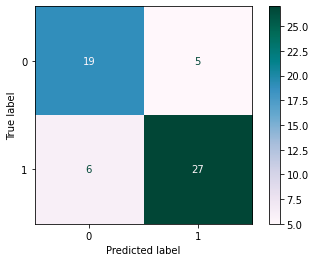

In [249]:
plot_confusion_matrix(model,X_test, y_test,  cmap='PuBuGn');

In [191]:
from scipy.stats import f_oneway

### One-way ANOVA (also known as “analysis of variance”) is a test that is used to find out whether there exists a statistically significant difference between the mean values of more than one group.

Hypothesis involved:
A one-way ANOVA has the below given null and alternative hypotheses:

H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

In [255]:
l1 = np.arange(1,10)
l2 = np.arange(10,20)
f_oneway(l1,l2)

F_onewayResult(statistic=51.0, pvalue=1.6517710500934976e-06)

In [250]:
Purchased_Age = df[df["Purchased"] == 1]['Age']
NPurchased_Age = df[df["Purchased"] == 0]['Age']

In [259]:
print(Purchased_Age.mean(), NPurchased_Age.mean())

46.514084507042256 34.978873239436616


In [262]:
f_oneway(Purchased_Age.values, NPurchased_Age.values)

F_onewayResult(statistic=133.36478028660568, pvalue=1.6087546838046225e-25)

Since the p-value is less than 0.05 hence we would reject the null hypothesis meaning accept the column. This implies that we have sufficient proof to say that there exists a difference between Ages that are purchasing and not purchasing

In [263]:
l1 = np.arange(11,21)
l2 = np.arange(10,20)
f_oneway(l1,l2)

F_onewayResult(statistic=0.5454545454545455, pvalue=0.4697020728007999)

#### if p<0.05 correlation exists

In [265]:
from scipy.stats import chi2_contingency

# defining the table
# cross tabulate the categorical variables
# example Gender cross tabulate  Smokers and Non Smokers
data = [[48, 20], [19, 100]]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Columns are correlated / Dependent (reject H0)')
else:
    print('Columns are not correlated / Independent (H0 holds true)')

p value is 2.2168145773084616e-13
Columns are correlated / Dependent (reject H0)
